# Projet # 1 : Analyse de texte



#### Ouverture et lecture du fichier

In [24]:
with open('iampreparedtodie.txt', 'r') as f2:
    texte2 = f2.read()
len(texte2.split())

10691

In [25]:
with open('ihaveadream_full.txt', 'r') as f1:
    texte1 = f1.read()
len(texte1.split())

986

In [26]:
# with open('historywillabsolveme.txt', 'r') as f1:
#     texte = f1.read()
# len(texte.split())

In [27]:
# with open('ghandi1922.txt', 'r') as f1:
#     texte = f1.read()
# len(texte.split())

#### Tokenisation du texte + élimination des stopwords

In [28]:
import string
punc = string.punctuation+"’"+"”"+"—"+"“"

In [29]:
from nltk.corpus import stopwords
sw =  stopwords.words('english')

In [30]:
def tokenize(texte):
    for i in punc:
        texte = texte.replace(i, ' ')
    tokens = texte.split()
    tokens = [i.lower() for i in tokens if i.lower() not in sw]
    return tokens 

#### Création du dictionnaire

In [31]:
tokens1 = tokenize(texte1)
tokens2 = tokenize(texte2)
dict_1 = {i : tokens1.count(i) for i in set(tokens1)}
dict_2 = {i : tokens2.count(i) for i in set(tokens2)}

#### Création de la fonction qui donne le dictionnaire des n mots les plus récurrents 

In [32]:
def sort_dic(dict_, n):
    return dict(sorted(tuple(dict_.items()), reverse=True, key=lambda i : i[1])[:n])

In [33]:
frequent_w1 = sort_dic(dict_1, 30)            
frequent_w2 = sort_dic(dict_2, 30) 
frequent_w1           


{'freedom': 13,
 'ring': 12,
 'negro': 11,
 'let': 11,
 'dream': 10,
 'one': 10,
 'every': 8,
 'day': 8,
 'satisfied': 8,
 'today': 7,
 'white': 6,
 'long': 6,
 'men': 6,
 'cannot': 6,
 'new': 5,
 'able': 5,
 'must': 5,
 'years': 5,
 'nation': 5,
 'black': 4,
 'great': 4,
 'later': 4,
 'children': 4,
 'land': 4,
 'american': 4,
 'free': 4,
 'still': 4,
 'mountain': 4,
 'join': 3,
 'words': 3}

In [34]:
import seaborn as sns 
import matplotlib.pyplot as plt

<Axes: >

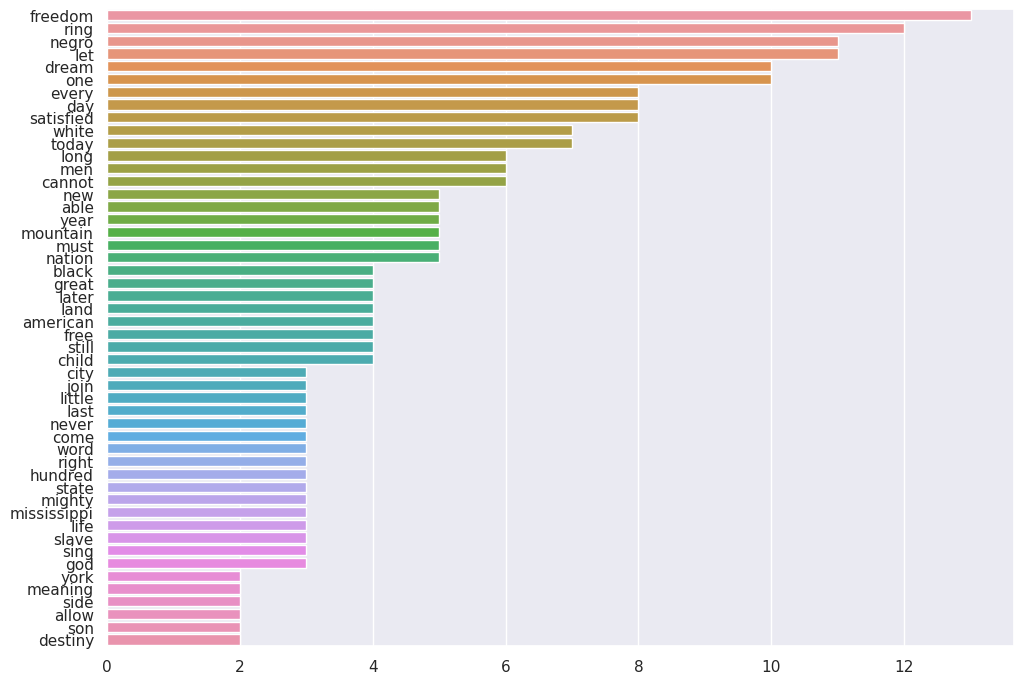

In [82]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=1)
sns.barplot(y=list(frequent_w1.keys()), x=list(frequent_w1.values()), orient='h')

#### Gestion des mots de la même famille

In [35]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [36]:
tokens_f1 = [lemmatizer.lemmatize(i) for i in tokens1]
tokens_f2 = [lemmatizer.lemmatize(i) for i in tokens2]

In [37]:
dict_f1 = {i : tokens_f1.count(i) for i in set(tokens_f1)}
dict_f2 = {i : tokens_f2.count(i) for i in set(tokens_f2)}
frequent_w1 = sort_dic(dict_f1, 50)
frequent_w2 = sort_dic(dict_f2, 50)

common_w = [i for i in frequent_w1 if i in frequent_w2]
common_w

['freedom', 'one', 'white', 'year', 'child', 'right', 'state', 'life']

#### Création du barplot avec Seaborn

#### Test d'un graphique

<Axes: >

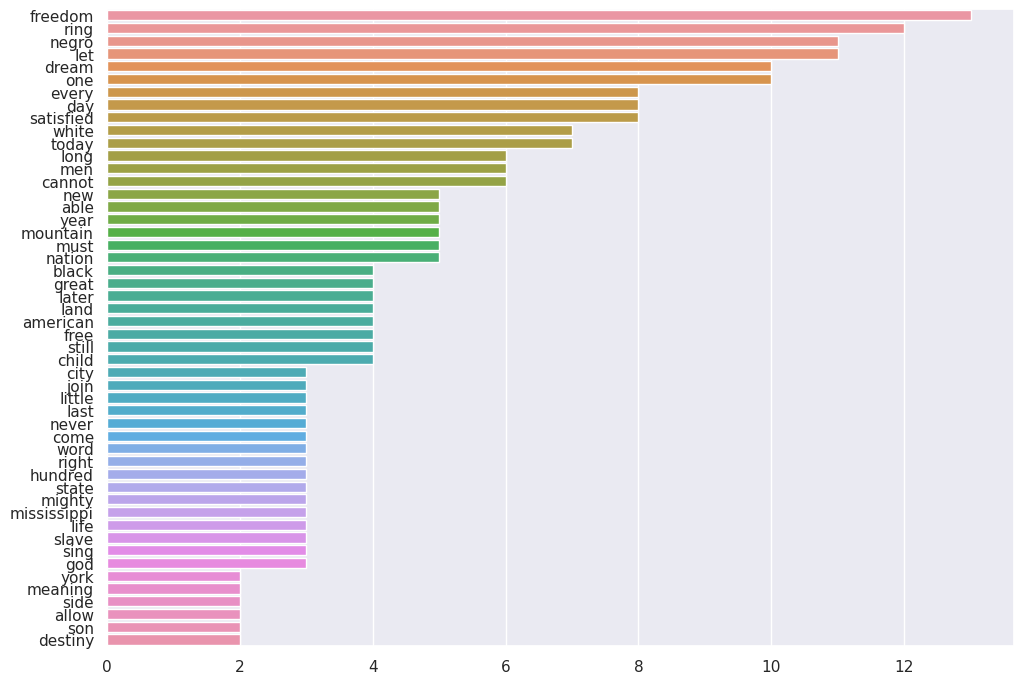

In [38]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=1)
sns.barplot(y=list(frequent_w1.keys()), x=list(frequent_w1.values()), orient='h')

#### Test de Axes avec Seaborn

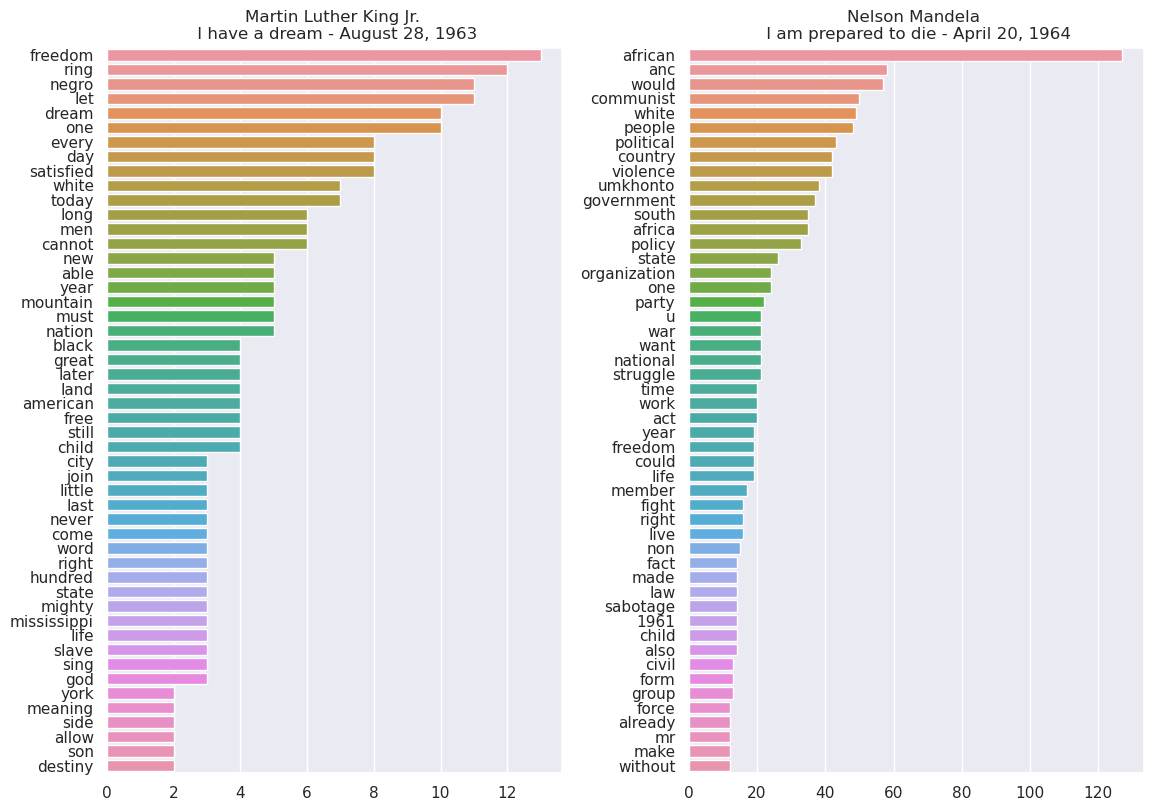

In [39]:
fig, axes = plt.subplots(1, 2, tight_layout=True)

sns.barplot(y=list(frequent_w1.keys()), x=list(frequent_w1.values()), orient='h', ax=axes[0])
axes[0].set(title='Martin Luther King Jr. \n I have a dream - August 28, 1963')

sns.barplot(y=list(frequent_w2.keys()), x=list(frequent_w2.values()), orient='h', ax=axes[1])
axes[1].set(title='Nelson Mandela \n I am prepared to die - April 20, 1964')
plt.show()
fig.savefig('barplots')

#### Création du WordCloud

In [84]:
from wordcloud import WordCloud
import numpy as np
from os import path
from PIL import Image

In [102]:
texte1 = ' '.join(tokens_f1)
texte2 = ' '.join(tokens_f2)

In [111]:
WC1 = WordCloud(max_font_size = 80, max_words = 30, background_color='white', mask=africa_mask, contour_width=1, contour_color='steelblue').generate(texte1)
WC2 = WordCloud(max_font_size = 80, max_words = 30, background_color='white', mask=usa_mask, contour_width=1, contour_color='steelblue').generate(texte2)

In [112]:
usa_mask = np.array(Image.open("africa-map-vector-silhouette-vector-map-africa-black-silhouette-african-madagascar-nigeria-camerun-egypt-somalia-congo-vector-107939994.jpg"))
africa_mask = np.array(Image.open("america-country-shape-icon-black-map-55126266.jpg"))

<Figure size 100000x100000 with 0 Axes>

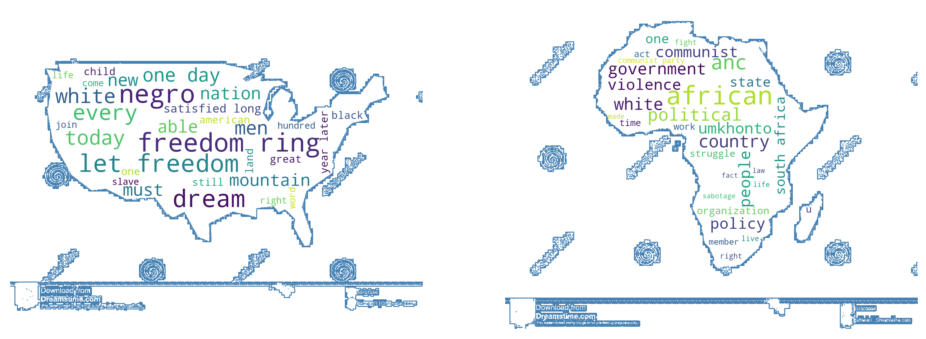

In [113]:
plt.figure(figsize=(1000,1000))
fig2, axs = plt.subplots(1, 2)
axs[0].imshow(WC1, interpolation='bilinear')
axs[0].axis('off')
axs[1].imshow(WC2, interpolation='bilinear')
axs[1].axis('off')
fig2.savefig('WordCloud2')
plt.show()

In [106]:
text_list = ['M. Luther King','N. Mandela']

common_dic1 = {}
for i in common_w:
    common_dic1[i] = frequent_w1[i]
common_dic1 = sort_dic(common_dic1, 30)
print(common_dic1)

common_dic2 = {}
for i in common_w:
    common_dic2[i] = frequent_w2[i]
common_dic2 = sort_dic(common_dic2, 30)
print(common_dic2)
list(common_dic2)[::-1]

{'freedom': 13, 'one': 10, 'white': 7, 'year': 5, 'child': 4, 'right': 3, 'state': 3, 'life': 3}
{'white': 49, 'state': 26, 'one': 24, 'freedom': 19, 'year': 19, 'life': 19, 'right': 16, 'child': 14}


['child', 'right', 'life', 'year', 'freedom', 'one', 'state', 'white']

In [107]:
words_freq = []
for word in common_w:
    dico = {}           # les values sont de longueur 2
    dico['Name'] = [f'name={word}'.split('=')[1] for _ in range(2)]
    dico['Speech'] = text_list
    dico['Rank'] = [list(common_dic1)[::-1].index(word), list(common_dic2)[::-1].index(word)]
    words_freq.append(dico)
words_freq

[{'Name': ['freedom', 'freedom'],
  'Speech': ['M. Luther King', 'N. Mandela'],
  'Rank': [7, 4]},
 {'Name': ['one', 'one'],
  'Speech': ['M. Luther King', 'N. Mandela'],
  'Rank': [6, 5]},
 {'Name': ['white', 'white'],
  'Speech': ['M. Luther King', 'N. Mandela'],
  'Rank': [5, 7]},
 {'Name': ['year', 'year'],
  'Speech': ['M. Luther King', 'N. Mandela'],
  'Rank': [4, 3]},
 {'Name': ['child', 'child'],
  'Speech': ['M. Luther King', 'N. Mandela'],
  'Rank': [3, 0]},
 {'Name': ['right', 'right'],
  'Speech': ['M. Luther King', 'N. Mandela'],
  'Rank': [2, 1]},
 {'Name': ['state', 'state'],
  'Speech': ['M. Luther King', 'N. Mandela'],
  'Rank': [1, 6]},
 {'Name': ['life', 'life'],
  'Speech': ['M. Luther King', 'N. Mandela'],
  'Rank': [0, 2]}]

{'freedom': 13, 'one': 10, 'white': 7, 'year': 5, 'child': 4, 'right': 3, 'state': 3, 'life': 3}
['life', 'state', 'right', 'child', 'year', 'white', 'one', 'freedom']
['−1', '0', '1', '2', '3', '4', '5', '6', '7', '8']
['child', 'right', 'life', 'year', 'freedom', 'one', 'state', 'white']
['−1', 'life', 'state', 'right', 'child', 'year', 'white', 'one', 'freedom', '8']


/tmp/ipykernel_10743/3796950935.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)
/tmp/ipykernel_10743/3796950935.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(labels2)


<Figure size 1500x1500 with 0 Axes>

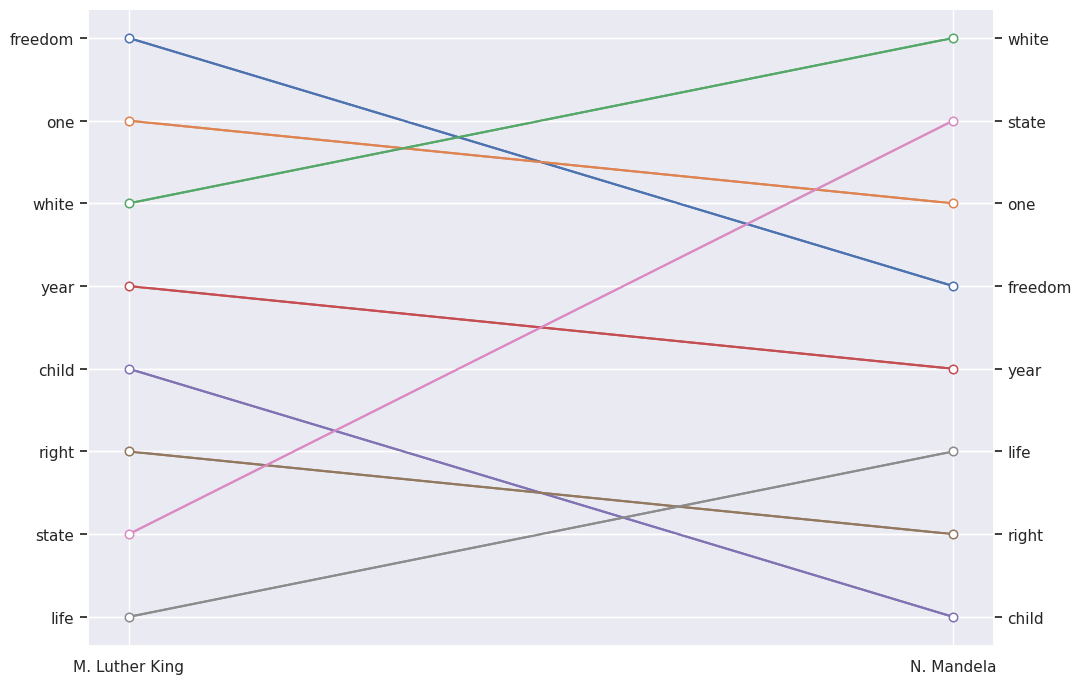

In [81]:
plt.figure(figsize=(15,15))
fig3, ax = plt.subplots()
fig3.canvas.draw()
for element in words_freq:
    ax.plot(element['Speech'], element['Rank'], "o-",markerfacecolor = 'white')
    ax.annotate(element['Name'][0], xy=(1.1, element['Rank'][1]), xytext = (1.1, element['Rank'][1]), va = "center")

y_ticks = sort_dic(common_dic1,len(common_dic1))
print(y_ticks)
y_ticks = list(y_ticks.keys())[::-1]
print(y_ticks)
labels = [item.get_text() for item in ax.get_yticklabels()]
print(labels)

for i in range(len(y_ticks)):
    labels[i+1]=y_ticks[i]

ax.set_yticklabels(labels)

ax2 = ax.twinx()
for element in words_freq:
    ax2.plot(element['Speech'], element['Rank'], "o-",markerfacecolor = 'white')

y2_ticks = sort_dic(common_dic2,len(common_dic2))
y2_ticks = list(y2_ticks.keys())[::-1]
print(y2_ticks)
labels2 = [item.get_text() for item in ax2.get_yticklabels()]
print(labels)

for i in range(len(y2_ticks)):
    labels2[i+1]=y2_ticks[i]

ax2.set_yticklabels(labels2)

fig3.savefig('slope2')
plt.show()
